In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

digit_recognizer_path = kagglehub.competition_download('digit-recognizer')

print('Data source import complete.')

100%|██████████| 15.3M/15.3M [00:01<00:00, 9.12MB/s]

Extracting files...


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

os.listdir(digit_recognizer_path)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['sample_submission.csv', 'train.csv', 'test.csv']

The beginning of code written by Chen-Chi Hwang to classify the MNIST dataset using a simple two layer NN.

In [ ]:
# reading data in
file_path = os.path.join(digit_recognizer_path, 'train.csv')
df = pd.read_csv(file_path)
# print(df.head())

data = df.to_numpy()

m, n = data.shape
print(m, n)

np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
image_dim,m_train = X_train.shape

print(image_dim, m_train)

42000 785
784 41000


In [ ]:
def init():
    W1 = np.random.rand(20, 784) - 0.5
    b1 = np.random.rand(20, 1) - 0.5
    W2 = np.random.rand(10, 20) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [ ]:
def relu(Z_1):
  A_1 = np.maximum(Z_1, 0)
  return A_1

def softmax(Z_2):
    exp_values = np.exp(Z_2)
    sum_exp = np.sum(exp_values, axis=0, keepdims=True)
    A_2 = exp_values / sum_exp
    return A_2

def feedfoward(W1, b1, W2, b2, X):
  Z_1 = W1.dot(X) + b1
  A_1 = relu(Z_1)
  Z_2 = W2.dot(A_1) + b2
  A_2 = softmax(Z_2)
  return Z_1, A_1, Z_2, A_2

In [ ]:
def relu_prime(Z_1):
  return Z_1 > 0

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backprop(Z_1, A_1, Z_2, A_2, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ_2 = A_2 - one_hot_Y
  dW2 = (1 / m) * dZ_2.dot(A_1.T)
  db2 = (1 / m) * np.sum(dZ_2)
  dZ_1 = W2.T.dot(dZ_2) * relu_prime(Z_1)
  dW1 = (1 / m) * dZ_1.dot(X.T)
  db1 = (1 / m) * np.sum(dZ_1)
  return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, b1, W2, b2 = init()
  for i in range(iterations):
    Z_1, A_1, Z_2, A_2 = feedfoward(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backprop(Z_1, A_1, Z_2, A_2, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if i % 50 == 0:
      print("Iteration: ", i)
      print(get_accuracy(get_predictions(A_2), Y))
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 0 5 ... 5 0 6] [8 8 6 ... 0 3 3]
0.11609756097560976
Iteration:  50
[2 8 6 ... 0 0 6] [8 8 6 ... 0 3 3]
0.4612926829268293
Iteration:  100
[2 8 6 ... 0 0 5] [8 8 6 ... 0 3 3]
0.6429024390243903
Iteration:  150
[2 8 6 ... 0 0 5] [8 8 6 ... 0 3 3]
0.7473658536585366
Iteration:  200
[8 8 6 ... 0 0 5] [8 8 6 ... 0 3 3]
0.7941463414634147
Iteration:  250
[8 8 6 ... 0 0 5] [8 8 6 ... 0 3 3]
0.8175121951219512
Iteration:  300
[8 8 6 ... 0 3 5] [8 8 6 ... 0 3 3]
0.8319268292682926
Iteration:  350
[8 8 6 ... 0 3 5] [8 8 6 ... 0 3 3]
0.8430975609756097
Iteration:  400
[8 8 6 ... 0 3 5] [8 8 6 ... 0 3 3]
0.850609756097561
Iteration:  450
[8 8 6 ... 0 3 5] [8 8 6 ... 0 3 3]
0.8561219512195122


In [ ]:
from matplotlib import pyplot as plt

def inference(X, W1, b1, W2, b2):
    _, _, _, A2 = feedfoward(W1, b1, W2, b2, X)
    return get_predictions(A2)

def test_inference(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = inference(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


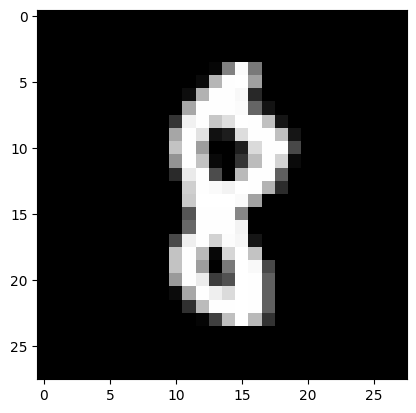

Prediction:  [8]
Label:  8


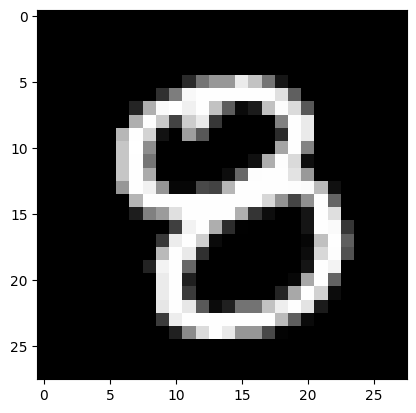

Prediction:  [6]
Label:  6


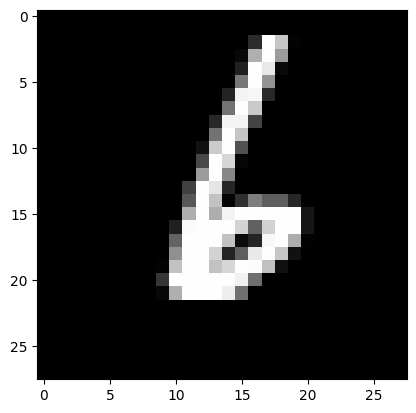

Prediction:  [5]
Label:  5


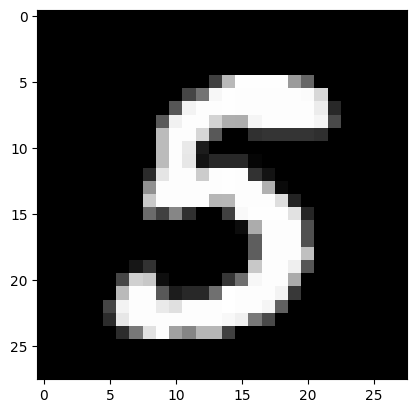

In [ ]:
test_inference(0, W1, b1, W2, b2)
test_inference(1, W1, b1, W2, b2)
test_inference(2, W1, b1, W2, b2)
test_inference(3, W1, b1, W2, b2)

In [ ]:
get_accuracy(inference(X_dev, W1, b1, W2, b2), Y_dev)

[5 1 0 5 2 3 5 7 2 0 2 0 5 2 4 2 7 1 4 0 8 0 9 1 0 1 9 0 7 2 8 7 1 1 4 3 9
 8 9 3 9 0 2 0 4 5 4 3 2 3 4 9 4 4 1 8 1 2 7 2 3 2 1 9 8 0 5 9 0 9 9 7 6 8
 6 0 3 2 5 7 8 4 9 0 9 3 0 6 2 0 1 6 9 1 1 1 9 9 1 9 9 8 2 9 4 3 0 0 2 2 6
 6 6 4 3 1 2 3 1 4 3 3 5 4 9 9 5 5 8 3 4 9 8 5 6 8 4 3 4 2 4 2 9 5 8 7 5 8
 1 7 3 1 0 9 4 1 6 7 8 5 1 0 5 1 6 4 8 7 7 2 6 4 1 3 1 2 3 0 9 2 4 4 5 9 9
 6 1 9 3 6 1 6 6 1 5 9 4 6 0 1 3 3 6 9 3 9 1 5 6 4 0 5 4 6 0 6 5 1 8 4 6 1
 6 4 4 5 4 2 4 2 6 6 2 1 4 5 3 3 8 4 8 4 3 9 8 5 6 2 3 4 3 1 1 5 0 1 6 5 0
 9 4 3 5 0 6 3 4 4 6 1 0 7 0 7 8 6 4 4 0 3 8 3 8 5 4 9 4 3 3 2 9 2 2 0 4 6
 3 4 9 2 2 8 1 6 9 5 1 4 6 7 9 0 9 1 1 5 6 5 6 7 2 7 6 1 9 5 6 6 8 9 9 4 9
 6 2 7 1 6 1 4 9 6 7 2 2 7 9 4 3 9 1 0 7 7 1 6 2 6 0 5 4 8 3 1 7 9 1 4 1 4
 1 3 9 4 1 0 7 4 6 2 6 3 7 7 3 9 4 9 2 6 3 7 9 6 1 3 9 1 4 6 1 2 5 0 1 7 9
 6 1 1 3 3 5 2 7 0 8 0 4 5 5 0 1 0 1 9 8 5 4 0 9 3 5 3 5 2 2 5 2 9 2 7 9 3
 8 3 8 6 9 7 9 5 6 9 8 4 6 4 2 8 2 8 8 1 6 3 9 1 5 6 1 4 6 9 2 5 3 0 0 6 3
 1 4 4 4 2 3 4 5 8 0 7 9 

np.float64(0.864)